## Data Wrangling Project
Apply Data wrangling skills on real Data from Twitter by Gathering, assessing, and cleaning the Data make it ready and convinent for the analysis, then apply the analysis

### Gathering Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

In [2]:
#Twitter Archieve files
#upload and read twitter data into a DF
twitter_arch_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#download tweet image prediction programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
#Twitter Authentication & API 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweets_list = list(twitter_arch_df.tweet_id)

tdata = {}

for tweet in tweets_list:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tdata[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Rate limit reached. Sleeping for: 737
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 736


In [7]:
with open('tweet_json.txt', 'w') as file:  
    json.dump(tdata, file, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)
    
twitter_json= pd.read_json('tweet_json.txt',orient='index')

In [8]:
twitter_arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Assesing Data

#### Tweets Data

In [9]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_arch_df['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
Daisy           7
Toby            7
Bailey          7
an              7
Jack            6
Rusty           6
Jax             6
Oscar           6
Stanley         6
Milo            6
Leo             6
Dave            6
Koda            6
Scout           6
Bella           6
Finn            5
             ... 
Ebby            1
Apollo          1
Odin            1
Rose            1
Gert            1
Zooey           1
Covach          1
Rilo            1
Sky             1
incredibly      1
Meatball        1
Boston          1
Bobbay          1
Derby           1
Barry           1
Joey            1
Dallas          1
Mabel           1
Dixie           1
Tango           1
Flash           1
Siba            1
Chesterson      1
Kloey           1
by        

#### Assesing Data - Image Prediction

In [12]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

##### Assesing Data - Tweet JSON

In [16]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [17]:
twitter_json.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2331.000000,2331.0,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2331.000000,2196.0,2196.0,2.600000e+01,2.600000e+01,2331.000000,2331.0,2331.000000
mean,NaN,NaN,7517.348348,0.0,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013299,0.0,0.0,8.113972e+17,8.113972e+17,2685.589018,0.0,0.105105
std,NaN,NaN,11670.577367,0.0,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114577,0.0,0.0,6.295843e+16,6.295843e+16,4541.247263,0.0,0.306755
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,1.000000,0.0,0.000000
25%,NaN,NaN,1310.500000,0.0,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,543.000000,0.0,0.000000
50%,NaN,NaN,3268.000000,0.0,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1258.000000,0.0,0.000000
75%,NaN,NaN,9203.500000,0.0,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3122.000000,0.0,0.000000
max,NaN,NaN,155288.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,77223.000000,0.0,1.000000


In [18]:
twitter_json.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2396,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,460,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,121,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,112,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,271,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,130,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,96,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [19]:
twitter_json['favorite_count'].value_counts()

0        163
1871       4
316        4
231        3
2927       3
2703       3
3094       3
294        3
1214       3
1452       3
905        3
2010       3
2514       3
1066       3
3809       3
722        3
7879       2
3231       2
2261       2
1151       2
4223       2
220        2
1745       2
2298       2
9235       2
3582       2
2188       2
3770       2
3766       2
2194       2
        ... 
2656       1
12893      1
20546      1
23130      1
26617      1
2610       1
2612       1
2614       1
2618       1
2620       1
573        1
2622       1
2624       1
4675       1
2628       1
2630       1
12871      1
2632       1
21065      1
25163      1
10828      1
589        1
593        1
6208       1
597        1
10838      1
599        1
2648       1
601        1
19005      1
Name: favorite_count, Length: 1989, dtype: int64

## Quality

We are only considering the original tweets and skip the retweets from our analysis

* Remove the retweet_count: it will make the analysis inaccurate since we are only intrested in the original tweets and   skipping the retweeted ones
* retweets data records should be excluded
* source column is unstable and hard to rad
* misspelleddog names. cross reference with names column
* Check duplicate values from all columns
* unnecessary columns for analysis
* Incorrect values are extracted from Rating numerator and denominator columns.


* no consistency in starting letter of p1, p2, p3 columns
* Missing observations ( 2075 instead of 2356 )
* Remove '_' from p1,p2,p3 columns

* id name is different and has no match with previous tweet_id column
* retweeted_status records need to be excluded

## Tidyness 

* Date and timestamp data type is object
* Tweet_id column datatype is integer
* Single column for multiple dog stages

* convert id column to string
* Consolidate the tweet_wrd table into the arranged columns

## Cleaning Data

In [20]:
# Create copy of each dataframe and retain original files
twitter_arch_df_clean=twitter_arch_df.copy()
image_prediction_clean=image_prediction.copy()
twitter_json_clean=twitter_json.copy()

### Cleaning quality issues

### Define

Checking retweet records-retweet_staus in the data

### Code

In [21]:
twitter_arch_df_clean[twitter_arch_df_clean.retweeted_status_id.notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [22]:
# Removing the retweet information from wrd tweet dataframe
twitter_arch_df_clean.drop(twitter_arch_df_clean[twitter_arch_df_clean['retweeted_status_id'].notnull()==True].index, inplace=True)

In [23]:
# Delete all columns pf retweet data
twitter_arch_df_clean=twitter_arch_df_clean.drop('retweeted_status_id', 1)
twitter_arch_df_clean=twitter_arch_df_clean.drop('retweeted_status_user_id', 1)
twitter_arch_df_clean=twitter_arch_df_clean.drop('retweeted_status_timestamp', 1)

### Test

In [25]:
# columns retained in wrd_clean tweet data
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Define

Cleaning the content of source column to make it readable

In [26]:
import re
twitter_arch_df_clean.source=twitter_arch_df_clean.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [28]:
twitter_arch_df_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1108,734559631394082816,NaN,NaN,2016-05-23 01:40:38 +0000,Vine - Make a Scene,When your friend is turnt af and you're just t...,https://vine.co/v/iExiLXiiHvX,10,10,None,None,None,None,None


### Define

Replace faulty / missed names to a correct ones

### Code

In [30]:
twitter_arch_df_clean['name'].replace('the', 'None', inplace=True)
twitter_arch_df_clean['name'].replace("all",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("this",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("very",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("life",'None', inplace=True)
twitter_arch_df_clean['name'].replace("an",'None', inplace=True)
twitter_arch_df_clean['name'].replace("my",'None', inplace=True)
twitter_arch_df_clean['name'].replace("O","None", inplace=True)
twitter_arch_df_clean['name'].replace("light",'None', inplace=True)
twitter_arch_df_clean['name'].replace("by",'None', inplace=True)
twitter_arch_df_clean['name'].replace("actually",'None', inplace=True)
twitter_arch_df_clean['name'].replace("just",'None', inplace=True)
twitter_arch_df_clean['name'].replace("mad",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("not",'None', inplace=True)
twitter_arch_df_clean['name'].replace("one",'None', inplace=True)
twitter_arch_df_clean['name'].replace("getting",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("infuriating",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("old",'None', inplace=True) 
twitter_arch_df_clean['name'].replace("quite","None", inplace=True)
twitter_arch_df_clean['name'].replace("such","None", inplace=True)
twitter_arch_df_clean['name'].replace("a",'None', inplace=True)

In [31]:
twitter_arch_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Define

Getting unique elements from all the columns by removing duplicates

### Code

In [32]:
twitter_arch_df_clean.apply(lambda x: len(x.unique()))

tweet_id                 2175
in_reply_to_status_id      78
in_reply_to_user_id        32
timestamp                2175
source                      4
text                     2175
expanded_urls            2117
rating_numerator           40
rating_denominator         18
name                      935
doggo                       2
floofer                     2
pupper                      2
puppo                       2
dtype: int64

### Test

In [33]:
twitter_arch_df_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
Remove unwanted columns from wrd tweet data for efficient analysis

### Code

In [34]:
twitter_arch_df_clean.drop(['expanded_urls','in_reply_to_user_id', 'in_reply_to_status_id'], 1, inplace=True)

### Test

In [35]:
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [36]:
twitter_arch_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Define
Extracting right values for rating numerator and denominator columns

In [38]:
# Extracting and storing ratings from tweet 
extract=twitter_arch_df_clean['text'].str.findall(r'(\d+(\.\d+)|(\d+))\/(\d+)')

# Checking ratings datatype
type(extract.iloc[0])

# Converte rating numerator datatype to float
twitter_arch_df_clean.rating_numerator=twitter_arch_df_clean.rating_numerator.astype(float)

#Verifying the change in ratings value before and after extraction
print(twitter_arch_df_clean[twitter_arch_df_clean.tweet_id== 883482846933004288].rating_numerator)

for i, row in twitter_arch_df_clean.iterrows():
    twitter_arch_df_clean.set_value(i,'rating_numerator', float((extract[i][-1][0])))
    twitter_arch_df_clean.set_value(i,'rating_denominator', float((extract[i][-1][3])))
        
print(twitter_arch_df_clean[twitter_arch_df_clean.tweet_id== 883482846933004288].rating_numerator)

45    5.0
Name: rating_numerator, dtype: float64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


45    13.5
Name: rating_numerator, dtype: float64


### Test

In [39]:
twitter_arch_df_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2063,671159727754231808,2015-11-30 02:52:03 +0000,Twitter for iPhone,This is Anthony. He just finished up his maste...,5.0,10,Anthony,None,None,None,None
2038,671550332464455680,2015-12-01 04:44:10 +0000,Twitter for iPhone,After 22 minutes of careful deliberation this ...,1.0,10,None,None,None,None,None
377,828011680017821696,2017-02-04 22:45:42 +0000,Twitter for iPhone,Say hello to Brutus and Jersey. They think the...,11.0,10,Brutus,None,None,None,None
909,757725642876129280,2016-07-25 23:54:05 +0000,Twitter for iPhone,This is Beckham. He fell asleep at the wheel. ...,11.0,10,Beckham,None,None,None,None
1241,712065007010385924,2016-03-21 23:55:01 +0000,Twitter for iPhone,This is Chester. He's clearly in charge of the...,6.0,10,Chester,None,None,None,None
2234,668190681446379520,2015-11-21 22:14:07 +0000,Twitter for iPhone,This is Skittles. I would kidnap Skittles. Pin...,12.0,10,Skittles,None,None,None,None
1636,684200372118904832,2016-01-05 02:30:55 +0000,Twitter for iPhone,Gang of fearless hoofed puppers here. Straight...,6.0,10,None,None,None,None,None
775,776201521193218049,2016-09-14 23:30:38 +0000,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,10.0,10,None,None,None,None,None
501,813096984823349248,2016-12-25 19:00:02 +0000,Twitter for iPhone,This is Rocky. He got triple-doggo-dared. Stuc...,11.0,10,Rocky,doggo,None,None,None
1760,678708137298427904,2015-12-20 22:46:44 +0000,Vine - Make a Scene,Here we are witnessing a wild field pupper. Lo...,10.0,10,None,None,None,pupper,None


In [40]:
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 283.9+ KB


## Images data

### Define
Capitalize the starting letter of first word in p1, p2 and p3 columns

### Code

In [41]:
image_prediction_clean.p1=image_prediction_clean.p1.str.capitalize()
image_prediction_clean.p2=image_prediction_clean.p2.str.capitalize()
image_prediction_clean.p3=image_prediction_clean.p3.str.capitalize()

### Test

In [42]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
Replace the ("_") in the p1, p2, and p3 columns

### Code

In [43]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.replace('_', ' ')
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.replace('_', ' ')
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.replace('_', ' ')

### Test

In [45]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Tweets Data JSON

### Define
Convert id column to tweet_id column to match the other two columns id

In [47]:
twitter_json_clean.rename(columns= {'id': 'tweet_id'}, inplace=True)

### Test

In [48]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
tweet_id                         2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

## Tidyness issues

### Tweets Archive Data

### Define
Convert tweet_id into panda objects and rating numerator and denominator to float as ratings can be float as well

### Code

In [49]:
twitter_arch_df_clean.tweet_id=twitter_arch_df_clean.tweet_id.astype('str')
twitter_arch_df_clean.rating_denominator=twitter_arch_df_clean.rating_denominator.astype(float)
twitter_arch_df_clean.rating_numerator=twitter_arch_df_clean.rating_numerator.astype(float)

### Test

In [51]:
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), object(9)
memory usage: 283.9+ KB


### Define
Convert date and time columns to datetime objects

### Code
Convert timestamp column from string to datetime object and split into time and date also, Convert date and time columns to datetime objects to ease calculations

In [52]:
from datetime import timedelta

twitter_arch_df_clean.timestamp= pd.to_datetime(twitter_arch_df_clean.timestamp)

# Extract date and time information from timestamp column.
twitter_arch_df_clean['date']= twitter_arch_df_clean.timestamp.apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_arch_df_clean['time']= twitter_arch_df_clean.timestamp.apply(lambda time: time.strftime('%H:%M'))

# Verify and delete timestamp column
twitter_arch_df_clean=twitter_arch_df_clean.drop('timestamp',1)

In [53]:
twitter_arch_df_clean['date']= pd.to_datetime(twitter_arch_df_clean['date'])
twitter_arch_df_clean['time']= pd.to_datetime(twitter_arch_df_clean['time'])

### Test

In [55]:
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 300.9+ KB


### Define
Melting 'doggo', 'floofer', 'pupper', 'puppo' columns into a single stages_dog column

### Code

In [56]:
twitter_arch_df_clean['stages_dog'] = twitter_arch_df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

twitter_arch_df_clean['stages_dog'].replace("NoneNoneNoneNone","None ", inplace=True)
twitter_arch_df_clean['stages_dog'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_arch_df_clean['stages_dog'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_arch_df_clean['stages_dog'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_arch_df_clean['stages_dog'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [57]:
twitter_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
stages_dog            2175 non-null object
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 317.9+ KB


In [58]:
twitter_arch_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

### Test

In [59]:
twitter_arch_df_clean

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,stages_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017-08-01,2020-07-06 16:23:00,None
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017-08-01,2020-07-06 00:17:00,None
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017-07-31,2020-07-06 00:18:00,None
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017-07-30,2020-07-06 15:58:00,None
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017-07-29,2020-07-06 16:00:00,None
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,2017-07-29,2020-07-06 00:08:00,None
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,2017-07-28,2020-07-06 16:27:00,None
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,2017-07-28,2020-07-06 00:22:00,None
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,2017-07-27,2020-07-06 16:25:00,None
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,2017-07-26,2020-07-06 15:59:00,doggo


In [60]:
twitter_arch_df_clean.stages_dog.value_counts()

None                    1831
pupper                   224
doggo                     75
puppo                     24
doggoNonepupperNone       10
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stages_dog, dtype: int64

## Image prediction JSON Dataset

### Define
Converting tweet_id datatype to object to maintain consistency

### Code

In [64]:
image_prediction_clean.tweet_id=image_prediction_clean.tweet_id.astype(str)

### Test

In [65]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [66]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [67]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
tweet_id                         2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

### Define
Converting id column to tweet_id column to match the other columns

### Code

In [69]:
twitter_json_clean.rename(columns= {'id': 'tweet_id'}, inplace=True)

### Test

In [70]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
geo                              0 non-null float64
tweet_id                         2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

### Define
Remove retweets data and retain only original tweets for analysis

### Code

In [72]:
twitter_json_clean[twitter_json_clean.retweeted_status.notnull()]
twitter_json_clean.drop(twitter_json_clean[twitter_json_clean.retweeted_status.notnull()].index, inplace=True)

In [73]:
twitter_json_clean.drop(['contributors','coordinates',
                    'entities',
                    'extended_entities','geo',
                    'id_str','in_reply_to_screen_name',
                    'in_reply_to_status_id','in_reply_to_status_id_str',
                    'in_reply_to_user_id',
                    'in_reply_to_user_id_str','is_quote_status','lang',
                    'place','possibly_sensitive','possibly_sensitive_appealable',
                    'quoted_status','quoted_status_id',
                    'quoted_status_id_str',
                    'retweeted_status','retweeted',
                    'source','truncated','user',
                    'favorited','created_at'], axis=1, inplace=True)

### Test

In [74]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2168 non-null int64
tweet_id          2168 non-null int64
retweet_count     2168 non-null int64
text              2168 non-null object
dtypes: int64(3), object(1)
memory usage: 84.7+ KB


### Define
Converting tweet_id datatype to object to maintain consistency

### Code

In [75]:
twitter_json_clean.tweet_id=twitter_json_clean.tweet_id.astype(str)

### Test

In [76]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2168 non-null int64
tweet_id          2168 non-null object
retweet_count     2168 non-null int64
text              2168 non-null object
dtypes: int64(2), object(2)
memory usage: 84.7+ KB


In [77]:
twitter_json_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2396,666020888022790144,460,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,121,666029285002620928,42,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,112,666033412701032448,41,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,271,666044226329800704,130,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,96,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


In [78]:
twitter_json_clean.tail()

,favorite_count,tweet_id,retweet_count,text
1998-03-31 06:59:18.926688256,37514,891327558926688256,8423,This is Franklin. He would like you to stop ca...
1998-04-04 11:32:37.279858688,39278,891689557279858688,7821,This is Darla. She commenced a snooze mid meal...
1998-04-05 22:26:21.378084864,23372,891815181378084864,3753,This is Archie. He is a rare Norwegian Pouncin...
1998-04-10 03:03:41.306343426,31064,892177421306343424,5660,This is Tilly. She's just checking pup on you....
1998-04-12 22:37:23.555336193,35980,892420643555336192,7657,This is Phineas. He's a mystical boy. Only eve...


## Merge Data together in one DataFrame 

### Define
Merge all three dataframes using 'tweet_id' column to form a main dataframe 'main_df' 

### Code

In [79]:
main_df=pd.merge(twitter_arch_df_clean, image_prediction_clean, on='tweet_id', how='inner')
main_df=pd.merge(main_df, twitter_json_clean, on='tweet_id', how='inner')

### Test

In [80]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 23 columns):
tweet_id              1297 non-null object
source                1297 non-null object
text_x                1297 non-null object
rating_numerator      1297 non-null float64
rating_denominator    1297 non-null float64
name                  1297 non-null object
date                  1297 non-null datetime64[ns]
time                  1297 non-null datetime64[ns]
stages_dog            1297 non-null object
jpg_url               1297 non-null object
img_num               1297 non-null int64
p1                    1297 non-null object
p1_conf               1297 non-null float64
p1_dog                1297 non-null bool
p2                    1297 non-null object
p2_conf               1297 non-null float64
p2_dog                1297 non-null bool
p3                    1297 non-null object
p3_conf               1297 non-null float64
p3_dog                1297 non-null bool
favorite_count     

In [81]:
main_df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1297.000000,1297.000000,1297.000000,1297.000000,1.297000e+03,1.297000e+03,1297.000000,1297.000000
mean,12.796083,10.545104,1.187355,0.586416,1.372540e-01,6.153904e-02,7708.838859,2269.972244
std,51.155324,7.872617,0.541113,0.273395,1.018138e-01,5.201483e-02,10818.507041,3678.110721
min,1.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,70.000000,11.000000
25%,10.000000,10.000000,1.000000,0.354674,5.445480e-02,1.657920e-02,1578.000000,521.000000
50%,11.000000,10.000000,1.000000,0.575751,1.204070e-01,4.970020e-02,3540.000000,1137.000000
75%,12.000000,10.000000,1.000000,0.836572,1.985600e-01,9.472660e-02,9521.000000,2674.000000
max,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01,119912.000000,56271.000000


In [82]:
main_df.head()

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017-07-31,2020-07-06 00:18:00,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,23372,3753,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017-07-30,2020-07-06 15:58:00,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,39278,7821,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017-07-29,2020-07-06 16:00:00,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,37514,8423,This is Franklin. He would like you to stop ca...
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,2017-07-29,2020-07-06 00:08:00,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,18900,2827,Here we have a majestic great white breaching ...
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,2017-07-28,2020-07-06 00:22:00,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,60654,17084,When you watch your owner call another dog a g...


### Define
Standardize the date and time column in their respective data formats

### Code

In [83]:
main_df['date'] = main_df['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
main_df['time'] = main_df['time'].apply(lambda time: time.strftime('%H:%M'))

In [84]:
main_df.drop(['img_num'], axis=1, inplace=True)

### test

In [85]:
main_df.head()

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,07-31-2017,00:18,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,23372,3753,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,07-30-2017,15:58,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,39278,7821,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,07-29-2017,16:00,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,37514,8423,This is Franklin. He would like you to stop ca...
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,07-29-2017,00:08,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,18900,2827,Here we have a majestic great white breaching ...
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,07-28-2017,00:22,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,60654,17084,When you watch your owner call another dog a g...


In [86]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 22 columns):
tweet_id              1297 non-null object
source                1297 non-null object
text_x                1297 non-null object
rating_numerator      1297 non-null float64
rating_denominator    1297 non-null float64
name                  1297 non-null object
date                  1297 non-null object
time                  1297 non-null object
stages_dog            1297 non-null object
jpg_url               1297 non-null object
p1                    1297 non-null object
p1_conf               1297 non-null float64
p1_dog                1297 non-null bool
p2                    1297 non-null object
p2_conf               1297 non-null float64
p2_dog                1297 non-null bool
p3                    1297 non-null object
p3_conf               1297 non-null float64
p3_dog                1297 non-null bool
favorite_count        1297 non-null int64
retweet_count         1297 non-null

## Storing Data

In [88]:
main_df.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')
main_df= pd.read_csv('twitter_archive_master.csv')

In [89]:
main_df.head()

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,07-31-2017,00:18,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,23372,3753,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,07-30-2017,15:58,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,39278,7821,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,07-29-2017,16:00,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,37514,8423,This is Franklin. He would like you to stop ca...
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,07-29-2017,00:08,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,18900,2827,Here we have a majestic great white breaching ...
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,07-28-2017,00:22,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,60654,17084,When you watch your owner call another dog a g...


In [90]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 22 columns):
tweet_id              1297 non-null int64
source                1297 non-null object
text_x                1297 non-null object
rating_numerator      1297 non-null float64
rating_denominator    1297 non-null float64
name                  1297 non-null object
date                  1297 non-null object
time                  1297 non-null object
stages_dog            1297 non-null object
jpg_url               1297 non-null object
p1                    1297 non-null object
p1_conf               1297 non-null float64
p1_dog                1297 non-null bool
p2                    1297 non-null object
p2_conf               1297 non-null float64
p2_dog                1297 non-null bool
p3                    1297 non-null object
p3_conf               1297 non-null float64
p3_dog                1297 non-null bool
favorite_count        1297 non-null int64
retweet_count         1297 non-null 

### Analysis on the main Dataset

In [91]:
main_df.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.297000e+03,1297.000000,1297.000000,1297.000000,1.297000e+03,1.297000e+03,1297.000000,1297.000000
mean,7.326556e+17,12.796083,10.545104,0.586416,1.372540e-01,6.153904e-02,7708.838859,2269.972244
std,6.628996e+16,51.155324,7.872617,0.273395,1.018138e-01,5.201483e-02,10818.507041,3678.110721
min,6.660293e+17,1.000000,7.000000,0.044333,1.011300e-08,1.740170e-10,70.000000,11.000000
25%,6.748054e+17,10.000000,10.000000,0.354674,5.445480e-02,1.657920e-02,1578.000000,521.000000
50%,7.062660e+17,11.000000,10.000000,0.575751,1.204070e-01,4.970020e-02,3540.000000,1137.000000
75%,7.789907e+17,12.000000,10.000000,0.836572,1.985600e-01,9.472660e-02,9521.000000,2674.000000
max,8.918152e+17,1776.000000,170.000000,1.000000,4.676780e-01,2.710420e-01,119912.000000,56271.000000


## Question
What are the top dogs types?

In [92]:
main_df['name'].value_counts()

None         434
Oliver         8
Tucker         7
Winston        7
Penny          6
Lucy           6
Cooper         6
Bella          5
Toby           5
Bailey         5
Sadie          5
Lola           5
Clarence       4
Sophie         4
Dexter         4
Clark          4
Scout          3
Oakley         3
Rusty          3
Koda           3
Riley          3
Stanley        3
Maggie         3
Larry          3
Cassie         3
Derek          3
Gary           3
Bo             3
Gus            3
Jimothy        3
            ... 
Rueben         1
Mollie         1
Katie          1
Abby           1
Siba           1
Sage           1
Sojourner      1
Charl          1
Tedders        1
Quinn          1
Filup          1
Tayzie         1
Marlee         1
Lorenzo        1
Link           1
Willy          1
Skittles       1
Dug            1
Gerbald        1
Mimosa         1
Waffles        1
Cedrick        1
Aspen          1
Herald         1
Rodman         1
Traviss        1
Harold         1
Brandi        

### Answer
Based on the analysis the top dogs types are Oliver, Tucker, Winston, Penny, Lucy, Cooper, and Bella

### Define
Identifying Dogs with lowest rating

In [94]:
main_df[main_df['rating_numerator']<3]

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
898,678424312106393600,Twitter for iPhone,This is Crystal. She's a shitty fireman. No se...,2.0,10.0,Crystal,12-20-2015,03:58,None,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,...,True,Toy poodle,0.101194,True,Shih-tzu,0.056037,True,5374,2490,This is Crystal. She's a shitty fireman. No se...
963,675153376133427200,Twitter for iPhone,What kind of person sends in a picture without...,1.0,10.0,None,12-11-2015,03:21,None,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,...,False,Mailbox,0.096027,False,Seat belt,0.034995,False,6039,2486,What kind of person sends in a picture without...
1103,670826280409919488,Twitter for iPhone,Scary dog here. Too many legs. Extra tail. Not...,2.0,10.0,None,11-29-2015,04:47,None,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,...,False,Tarantula,0.021631,False,Wolf spider,0.014837,False,5282,3858,Scary dog here. Too many legs. Extra tail. Not...
1217,668142349051129856,Twitter for iPhone,This lil pup is Oliver. Hops around. Has wings...,2.0,10.0,None,11-21-2015,19:02,None,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,...,False,Hen,0.037793,False,Wood rabbit,0.011015,False,551,265,This lil pup is Oliver. Hops around. Has wings...
1232,667549055577362432,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,11-20-2015,03:44,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,False,Spotlight,0.007737,False,Lampshade,0.001901,False,5502,2129,Never seen dog like this. Breathes heavy. Tilt...
1268,666786068205871104,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Wo...,2.0,10.0,None,11-18-2015,01:12,None,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,...,False,Slug,0.000055,False,Acorn,0.000026,False,712,455,Unfamiliar with this breed. Ears pointy af. Wo...
1287,666104133288665088,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,1.0,10.0,None,11-16-2015,04:02,None,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,...,False,Cock,0.033919,False,Partridge,0.000052,False,13567,5948,Not familiar with this breed. No tail (weird)....
1294,666051853826850816,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,2.0,10.0,None,11-16-2015,00:35,None,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,...,False,Mud turtle,0.045885,False,Terrapin,0.017885,False,1120,772,This is an odd dog. Hard on the outside but lo...


## Exploratory analysis & Visualization

In [95]:
# Find out popular tweets timing
main_df['time']= pd.to_datetime(main_df['time'])
main_df['Hour']=main_df.time.apply(lambda time: time.strftime('%H'))
main_df.Hour.value_counts()

00    175
01    174
02    136
16    131
03    117
17     98
18     70
23     68
04     63
15     60
19     55
21     46
20     40
22     33
05     21
14      6
06      3
13      1
Name: Hour, dtype: int64

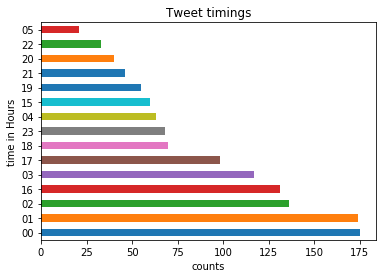

In [97]:
#Create histogram of tweet counts  timings
main_df_time_hour = main_df.groupby('Hour').filter(lambda x: len(x) >= 20);
main_df_time_hour['Hour'].value_counts().plot(kind = 'barh');
plt.title('Tweet timings'), plt.xlabel('counts'), plt.ylabel('time in Hours');

Findings: Most tweets happens during midnights

## Retweets vs favorite count


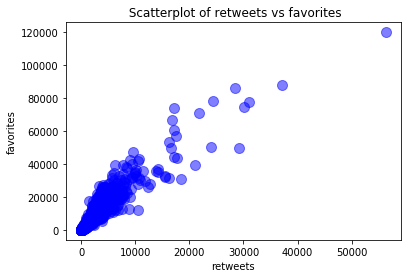

In [104]:
# Create a scatterplot between rating numerator and rating denominator to see their trend
main_df.plot(kind='scatter', x="retweet_count", y="favorite_count",alpha=0.5, color='blue', s=100);
plt.xlabel('retweets'), plt.ylabel('favorites'),
plt.title(' Scatterplot of retweets vs favorites');